In [1]:
from sklearn.datasets import load_iris
import random
import sklearn.tree
import pandas as pd
from tree_diff import tree, keep_regrow_alg

# Load Batches

(Small initial batch at t=1, full dataset at t=2)

In [2]:
iris = load_iris()
X, y = iris.data, iris.target

# Shuffle dataset
random.seed(2)
idx = random.sample(list(range(0,len(X))), k=len(X))
X = X[idx]
y = y[idx]

# batch 1
X1, y1 = X[:len(X) // 10], y[:len(X) // 10]
# batch 1 + 2 (full dataset)
X2, y2 = X, y

# Simple Decision tree (t=1)

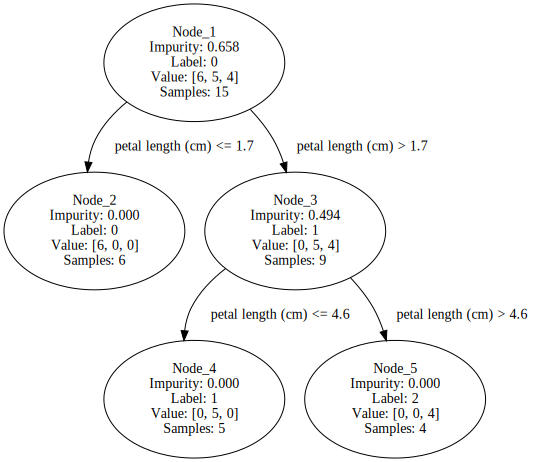

In [3]:
tree1 = tree.grow_tree(
    pd.DataFrame(X1, columns=iris.feature_names),
    y1,
    max_depth = 4
)
tree1.plot()

# Updated Decision tree (t=2)

Uses Keep-Regrow Algorithm to regrow the tree, while preserving the old tree structure where possible.

`alpha` penalises complexity, `beta` penalises changes. The underlying `regrow_func` used to regrow parts of the tree is customisable (can use sklearn or our own decision tree growth algorithm)

OLD NODE ROOT (Cost: 16)
    OLD LEAF petal length (cm) <= 1.7 (Cost: 1, Label: 0, Values: [48, 0, 0])
    NEW NODE petal length (cm) > 1.7 (Cost: 14)
        NEW LEAF petal width (cm) <= 1.7 (Cost: 9, Label: 1, Values: [2, 49, 5])
        NEW LEAF petal width (cm) > 1.7 (Cost: 3, Label: 2, Values: [0, 1, 45])


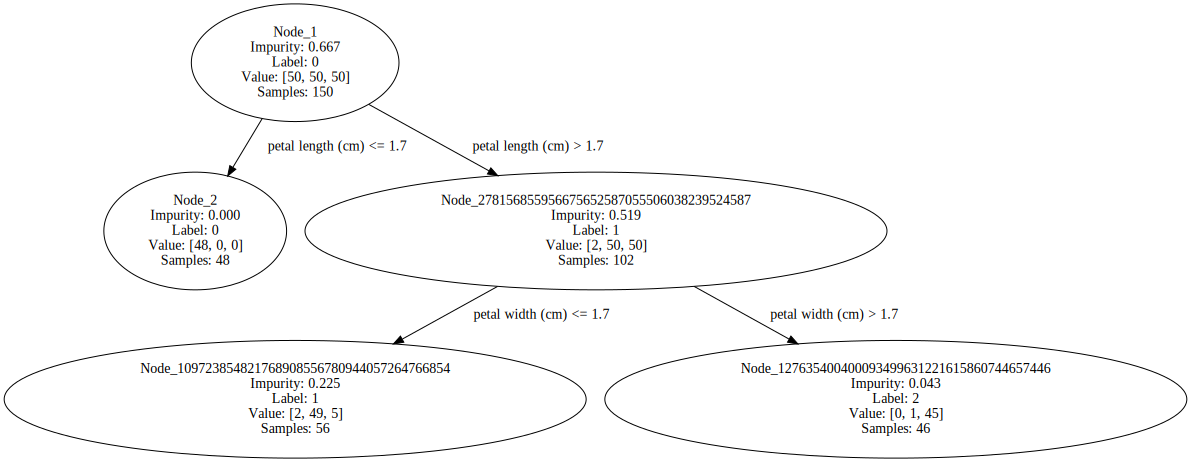

In [4]:
tree2 = keep_regrow_alg.grow_tree(
    pd.DataFrame(X2, columns=iris.feature_names),
    y2,
    old_tree = tree1,
    max_depth = 4,
    alpha = 1,
    beta = 1,
    regrow_func = lambda X, y, max_depth, metadata: tree.grow_tree(
        pd.DataFrame(X, columns=metadata.column_names), y, max_depth=max_depth
    )
)
print(tree2.pretty_print())
tree2.plot()